In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [ ]:
# Пример на стохастику без исходных данных
# старт генератора случайных чисел
np.random.seed(0)

# размер массива
N = 100
# последовательность (старт, стоп, шаг)
x = np.linspace(0, 1, 100)

# covariance function
def c(h):
    return np.exp(-np.abs(h ** 2 * 250))

# создаем матрицу размерами N * N
C = np.zeros((N, N))
# print(C)
# заполняем матрицу
for i in range(N):
    C[i, :] = c(x - x[i])

# eigen decomposition
# Декомпозиция матрицы
w, v = np.linalg.eig(C)

A = v @ np.diag(w ** 0.5)

# you can check, that C == A @ A.T

# independent normal values
zeta = np.random.randn(N)

# dependent multinormal values
Z = A @ zeta

# draw graph
pl.figure()

pl.plot(x, Z)

pl.show()
# traceback.print_stack()

pl.close()

In [ ]:
# с исходными данными
# старт генератора случайных чисел
np.random.seed(3)

# source data
M = 6

# coordinates of source data
u = np.random.rand(M)

# source data
z = np.random.randn(M)

# Modeling mesh
N = 100
x = np.linspace(0, 1, N)

# covariance function
def c(h):
    return np.exp(-np.abs(h ** 2 * 250))

# covariance matrix mesh-mesh
Cyy = np.zeros((N, N))
for i in range (N):
    Cyy[ i , : ] = c(x - x[i])

# covariance matrix mesh-data
Cyz = np.zeros((N, M))

# covariance matrix data-data
Czz = np.zeros((M, M))
for j in range (M):
    Cyz [:, j] = c(x - u[j])
    Czz [:, j] = c(u - u[j])

# posterior covariance
Cpost = Cyy - Cyz @ np.linalg.inv(Czz) @ Cyz.T

# lets find the posterior mean, i.e. Kriging interpolation
lamda = np.linalg.solve (Czz, z)
y = np.zeros_like(x)

# interpolation
for i in range (M):
    y += lamda[i] * c(u[i] - x)

# eigen decomposition
w, v = np.linalg.eig(Cpost)
A = v @ np.diag (w ** 0.5)

# you can check, that Cpost == A@A.T

# draw graph
pl.figure()
for k in range (5):
    # independent normal values
    zeta = np.random.randn(N)
    # dependent multinormal values
    Z = A @ zeta
    pl.plot(x, Z + y, color=[(5 - k) / 5] * 3)
    pl.plot(x, Z + y, color=[(5 - k) / 5] * 3, label='Stochastic realizations')

pl.plot(x, y, '. ', color='blue', alpha=0.4, label='Expectation(Kriging)')
pl.scatter(u, z, color='red', label='Source data')
pl.legend()
pl.show()
pl.close()

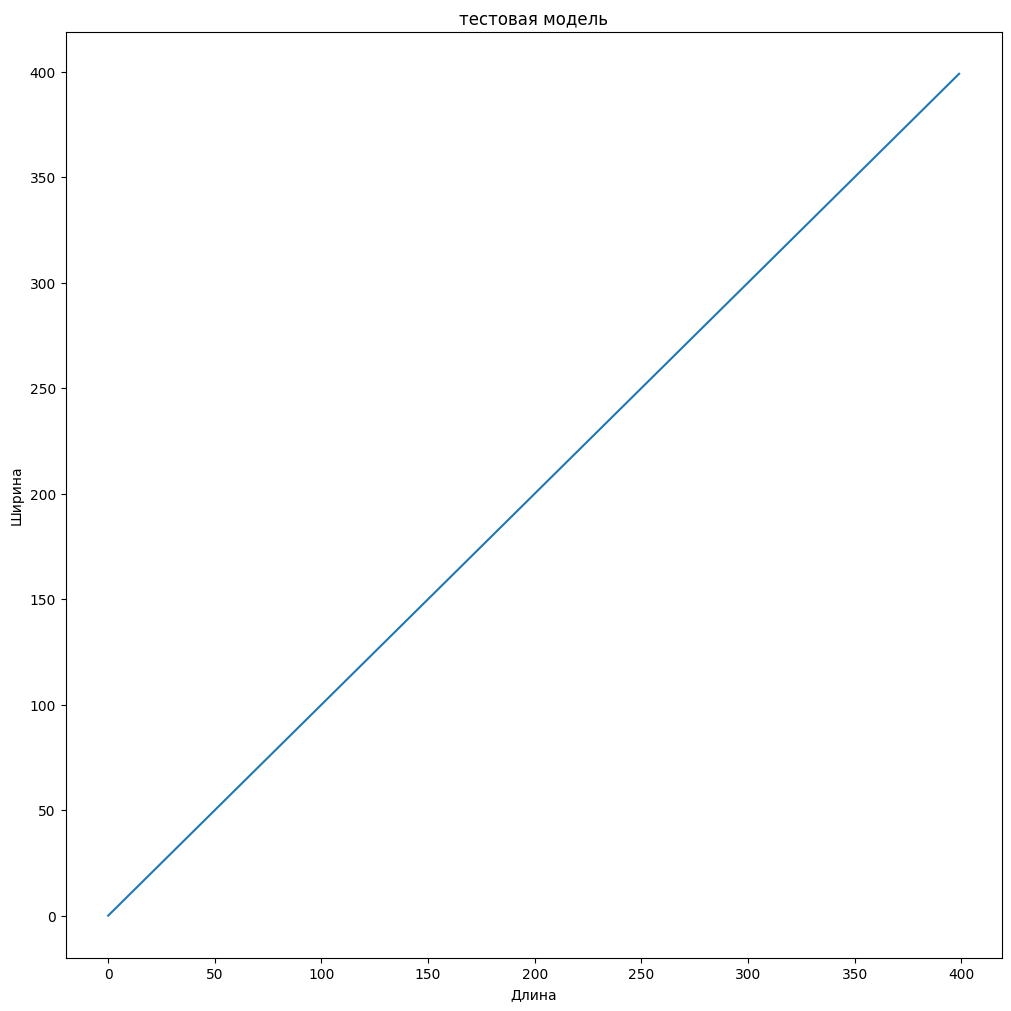

In [99]:
import matplotlib.gridspec as gridspec
# моя модель
fg = pl.figure(figsize=(10,10), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3,nrows=3,figure=fg)
# задаем размеры модели в блоках
mod_x = 20
mod_y = 20
# размер блока
size_x = 10
size_y = 10
# задаем координатную сетку
x = np.arange(0, 400, 1)
y = np.arange(0, 400, 1)
fg.set_title("тестовая модель")
pl.xlabel("Длина")
pl.ylabel("Ширина")
# pl.grid()
pl.plot(x, y)



In [ ]:
# covariance function
def c(h):
    return np.exp(-np.abs(h ** 2 * 250))

# создаем матрицу размерами N * N
C = np.zeros((N, N))
# print(C)
# заполняем матрицу
for i in range(N):
    C[i, :] = c(x - x[i])

# eigen decomposition
# Декомпозиция матрицы
w, v = np.linalg.eig(C)

A = v @ np.diag(w ** 0.5)

# you can check, that C == A @ A.T

# independent normal values
zeta = np.random.randn(N)

# dependent multinormal values
Z = A @ zeta

# draw graph
pl.figure()

pl.plot(x, Z)

pl.show()
# traceback.print_stack()

pl.close()